In [62]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib
import cv2
import numpy as np

In [2]:
image_shape = (224,224)

train_data_dir = 'natural_images/'

In [3]:


datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow_from_directory(train_data_dir, shuffle=True, target_size=image_shape)

Found 6899 images belonging to 8 classes.


In [4]:


def build_model(num_classes):
    model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=8, kernel_size=(3, 3), activation='relu', 
                           input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    return model

model = build_model(num_classes=8)

2022-08-28 20:34:38.529364: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-28 20:34:38.571452: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-28 20:34:38.571696: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-28 20:34:38.572263: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [5]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001), 
loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True), 
metrics=['accuracy'])

/home/kambakhsh/miniconda3/envs/tf_cpu/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 8)       224       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 8)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 16)      1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 32)        4640      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 32)       0

In [7]:

history = model.fit(train_generator,epochs=20,verbose=1)

Epoch 1/20


/home/kambakhsh/miniconda3/envs/tf_cpu/lib/python3.9/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
2022-08-28 20:34:49.884101: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8302
2022-08-28 20:34:50.586364: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-08-28 20:34:50.587069: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-08-28 20:34:50.587097: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2022-08-28 20:34:50.587800: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn ch

216/216 [==============================] - 18s 70ms/step - loss: 1.1579 - accuracy: 0.6130
Epoch 2/20
216/216 [==============================] - 15s 69ms/step - loss: 0.5502 - accuracy: 0.8161
Epoch 3/20
216/216 [==============================] - 15s 69ms/step - loss: 0.4114 - accuracy: 0.8566
Epoch 4/20
216/216 [==============================] - 15s 68ms/step - loss: 0.3141 - accuracy: 0.8907
Epoch 5/20
216/216 [==============================] - 14s 67ms/step - loss: 0.2564 - accuracy: 0.9110
Epoch 6/20
216/216 [==============================] - 14s 67ms/step - loss: 0.2128 - accuracy: 0.9255
Epoch 7/20
216/216 [==============================] - 14s 66ms/step - loss: 0.1806 - accuracy: 0.9394
Epoch 8/20
216/216 [==============================] - 15s 71ms/step - loss: 0.1539 - accuracy: 0.9480
Epoch 9/20
216/216 [==============================] - 14s 67ms/step - loss: 0.1284 - accuracy: 0.9601
Epoch 10/20
216/216 [==============================] - 15s 69ms/step - loss: 0.1150 - accurac

In [73]:
img = cv2.imread('natural_images/car/car_0000.jpg') 
img = cv2.resize(img, image_shape)

In [74]:
img = tf.constant(img)

In [75]:
img = tf.expand_dims(img, axis=0)

In [76]:
img.shape

TensorShape([1, 224, 224, 3])

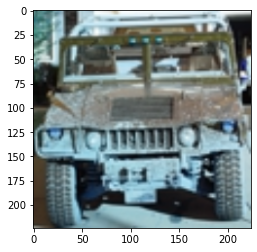

In [77]:
plt.imshow(img[0])

In [78]:
pred = model.predict(img)

1/1 [==============================] - 0s 18ms/step


In [79]:
predicted = np.argmax(pred, axis=1)

In [80]:
labels = (train_generator.class_indices)

In [81]:
labels

{'airplane': 0,
 'car': 1,
 'cat': 2,
 'dog': 3,
 'flower': 4,
 'fruit': 5,
 'motorbike': 6,
 'person': 7}

In [82]:
labels = dict((v,k) for k,v in labels.items())

In [83]:
labels

{0: 'airplane',
 1: 'car',
 2: 'cat',
 3: 'dog',
 4: 'flower',
 5: 'fruit',
 6: 'motorbike',
 7: 'person'}

In [84]:
labels[predicted[0]]

'car'

In [87]:
#save model 
model.save('./saved_model/my_model')

INFO:tensorflow:Assets written to: ./saved_model/my_model/assets


INFO:tensorflow:Assets written to: ./saved_model/my_model/assets
